## Weather Data Analysis

#### <a href="https://chandanshastri.github.io"> &copy; Chandan Shastri </a>

In [97]:
import tensorflow as tf

from pyspark.sql import SparkSession
from time import time

### Creating a Spark Session :

In [28]:
spark = SparkSession.builder.master('local').appName('TT').enableHiveSupport().getOrCreate()

In [29]:
spark

### Loading Data to Spark DataFrame from MySQL database :

In [32]:
isro = spark.read.jdbc("jdbc:mysql://localhost:3306","rrsc_aws.aws_log",properties={'user':'chandanshastri','password':'superman'})

In [36]:
isro.show(10,truncate=False)

+-------------------+------+---------+-------+------+-----+-----+-----+-----+-----+--------+-------+----------+-------+--------+
|RTIME              |REC_NO|Battery_V|AirTemp|RelHum|WS   |WD   |RAINt|RAINa|VWC  |SoilTemp|SlrAvg |SlrKjTot  |SlrWha |Slr_kJ_a|
+-------------------+------+---------+-------+------+-----+-----+-----+-----+-----+--------+-------+----------+-------+--------+
|2017-04-04 16:30:00|8     |13.31    |34.14  |29.65 |0.394|157.2|0.000|0.000|35.78|27.86   |121.400|218.480400|524.808|1889.308|
|2017-04-04 16:45:00|9     |13.28    |34.02  |31.51 |0.128|292.2|0.000|0.000|35.84|27.92   |99.700 |179.383700|574.636|2068.691|
|2017-04-04 17:00:00|10    |13.24    |33.65  |31.36 |0.183|184.9|0.000|0.000|35.84|27.97   |79.200 |142.552400|614.234|2211.243|
|2017-04-04 17:15:00|11    |13.23    |33.36  |31.74 |0.108|169.8|0.000|0.000|35.84|28.02   |60.500 |108.905900|644.486|2320.150|
|2017-04-04 17:30:00|12    |13.23    |33.30  |31.03 |0.175|210.4|0.000|0.000|35.83|28.06   |48.37

### Total Number of rows in our data 

In [113]:
isro.count()

29825

In [38]:
isro.printSchema()

root
 |-- RTIME: timestamp (nullable = true)
 |-- REC_NO: integer (nullable = true)
 |-- Battery_V: decimal(10,2) (nullable = true)
 |-- AirTemp: decimal(10,2) (nullable = true)
 |-- RelHum: decimal(10,2) (nullable = true)
 |-- WS: decimal(10,3) (nullable = true)
 |-- WD: decimal(10,1) (nullable = true)
 |-- RAINt: decimal(10,3) (nullable = true)
 |-- RAINa: decimal(10,3) (nullable = true)
 |-- VWC: decimal(10,2) (nullable = true)
 |-- SoilTemp: decimal(10,2) (nullable = true)
 |-- SlrAvg: decimal(10,3) (nullable = true)
 |-- SlrKjTot: decimal(10,6) (nullable = true)
 |-- SlrWha: decimal(10,3) (nullable = true)
 |-- Slr_kJ_a: decimal(10,3) (nullable = true)



### Selecting only the days on which there was Rainfall :

In [110]:
test = isro.filter((isro.RAINt>1)).select('RTIME','AirTemp','RelHum','RAINt')

In [111]:
test.show(10,truncate=False)

+-------------------+-------+------+-----+
|RTIME              |AirTemp|RelHum|RAINt|
+-------------------+-------+------+-----+
|2017-04-05 21:15:00|21.95  |81.30 |8.890|
|2017-04-06 20:45:00|23.38  |81.20 |1.016|
|2017-04-06 21:15:00|24.82  |78.76 |1.524|
|2017-04-06 21:30:00|22.39  |91.50 |1.270|
|2017-04-17 16:15:00|24.06  |66.82 |7.112|
|2017-05-09 19:00:00|25.42  |73.37 |1.270|
|2017-05-09 19:15:00|22.69  |90.90 |1.778|
|2017-05-10 19:45:00|22.85  |85.80 |1.524|
|2017-05-11 14:30:00|25.95  |80.70 |2.540|
|2017-05-14 15:45:00|29.13  |73.50 |1.016|
+-------------------+-------+------+-----+
only showing top 10 rows



### Average temperature for the whole period :

In [112]:
t=time()
isro.agg({"AirTemp":"avg"}).show()
print("Total time taken : " + str(time()-t) + " ms")

+------------+
|avg(AirTemp)|
+------------+
|   23.502284|
+------------+

Total time taken : 0.13900232315063477 ms


### Plotting a Time vs Temp Graph for Rainy days :

In [108]:
import matplotlib.pyplot as plt

In [99]:
rtime = test.select('RTIME').collect()

In [100]:
temp = test.select('AirTemp').collect()

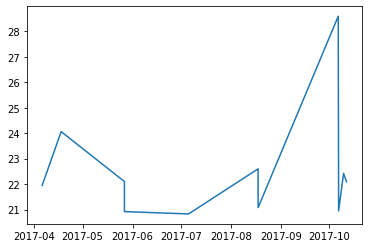

In [102]:
plt.plot(rtime,temp)